In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

plt.rc('font',family = 'serif')
plt.rcParams["mathtext.fontset"] = "cm"


def get_file(filename_):
    with open(filename_, "r") as file:
        file_content = file.readlines()
    df = pd.DataFrame(file_content, columns=['data'])
    return df

In [2]:
! ls

 input.lammps		       RDF_Hydrated_Bulk_Nafion.dat
 log.lammps		       relaxing_ionomer_with_solvent_shorter_time.data
 observe_initial_system.data   relaxing_ionomer_with_solvent_shorter_time.traj
'Process RDF.ipynb'


In [3]:
! code RDF_Hydrated_Bulk_Nafion.dat

In [4]:
df = pd.read_csv("RDF_Hydrated_Bulk_Nafion.dat", skiprows=4, header=None, sep=" ")
df.columns = ["bin","r","RDF S-S","CRD S-S","RDF S-Ow","CDF S-Ow","RDF S-Oh","CDF S-O"]

In [18]:
df[df["r"] > 15]

,bin,r,RDF S-S,CRD S-S,RDF S-Ow,CDF S-Ow,RDF S-Oh,CDF S-O
200,100000,200.0,NaN,NaN,NaN,NaN,NaN,NaN
401,150000,200.0,NaN,NaN,NaN,NaN,NaN,NaN
602,200000,200.0,NaN,NaN,NaN,NaN,NaN,NaN
803,250000,200.0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
len(df)

1004

In [21]:
df = df[df["r"] <= 15].copy()

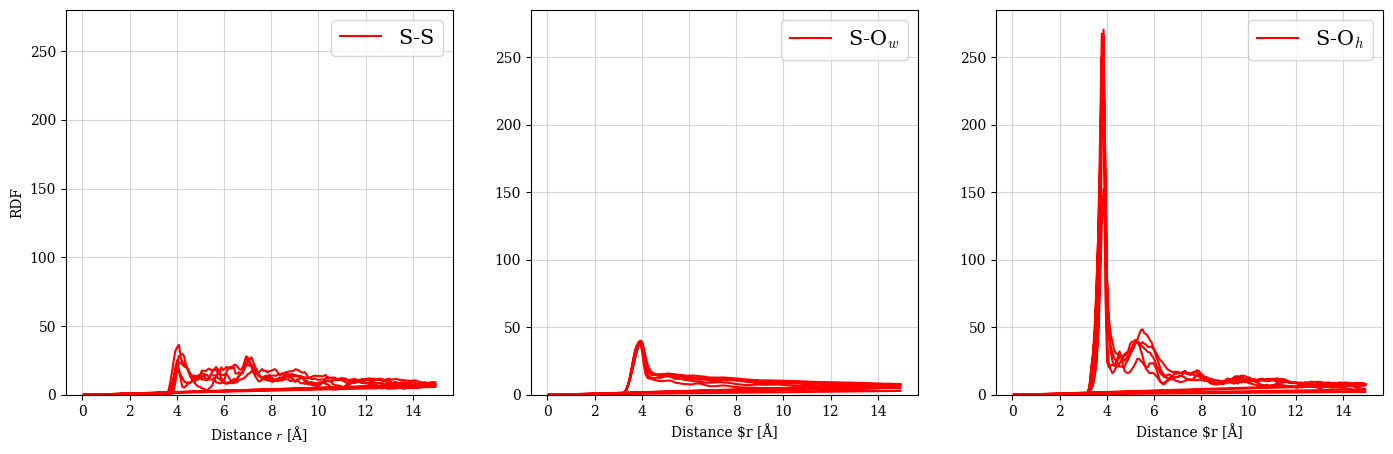

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))

ax[0].plot(df["r"], df["RDF S-S"], c="red", label = "S-S")
ax[0].set_xlabel("Distance $r$ [Å]")
ax[0].set_ylabel("RDF")
ax[0].legend(loc="upper right", fontsize=15)
ax[0].set_ylim([-0.1, 280])
ax[0].grid(alpha=0.5)

ax[1].plot(df["r"], df["RDF S-Ow"], c="red", label = "S-O$_w$")
ax[1].set_xlabel("Distance $r [Å]")
ax[1].legend(loc="upper right", fontsize=15)
ax[1].set_ylim([-0.1, 285])
ax[1].grid(alpha=0.5)

ax[2].plot(df["r"], df["RDF S-Oh"], c="red", label = "S-O$_h$")
ax[2].set_xlabel("Distance $r [Å]")
ax[2].legend(loc="upper right", fontsize=15)
ax[2].set_ylim([-0.1, 285])
ax[2].grid(alpha=0.5)

plt.show()

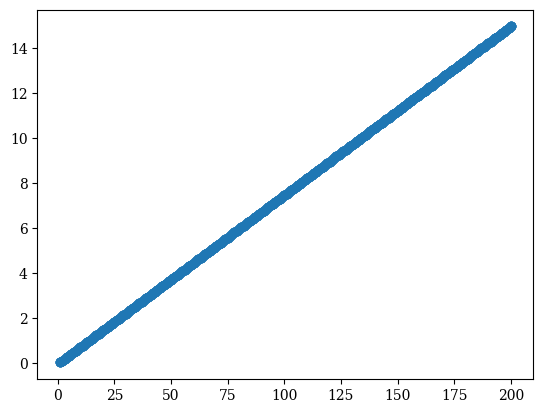

In [23]:
plt.scatter(df["bin"],df["r"])

In [26]:
df[df["r"] == 5.3625]

,bin,r,RDF S-S,CRD S-S,RDF S-Ow,CDF S-Ow,RDF S-Oh,CDF S-O
71,72,5.3625,4.59744,0.107722,9.39558,7.62482,26.7259,0.823125
272,72,5.3625,11.28860,0.194014,12.17050,8.70158,37.9500,0.976153
473,72,5.3625,11.88890,0.274597,13.65360,9.25754,36.7187,0.955514
674,72,5.3625,19.10720,0.261569,15.06920,9.56868,44.3557,0.861757
875,72,5.3625,12.73810,0.238847,15.18660,9.82463,38.9251,0.805778


In [29]:
df[df["bin"] == 1]

,bin,r,RDF S-S,CRD S-S,RDF S-Ow,CDF S-Ow,RDF S-Oh,CDF S-O
0,1,0.0375,0.0,0.0,0.0,0.0,0.0,0.0
201,1,0.0375,0.0,0.0,0.0,0.0,0.0,0.0
402,1,0.0375,0.0,0.0,0.0,0.0,0.0,0.0
603,1,0.0375,0.0,0.0,0.0,0.0,0.0,0.0
804,1,0.0375,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_ = df.groupby("bin").mean()

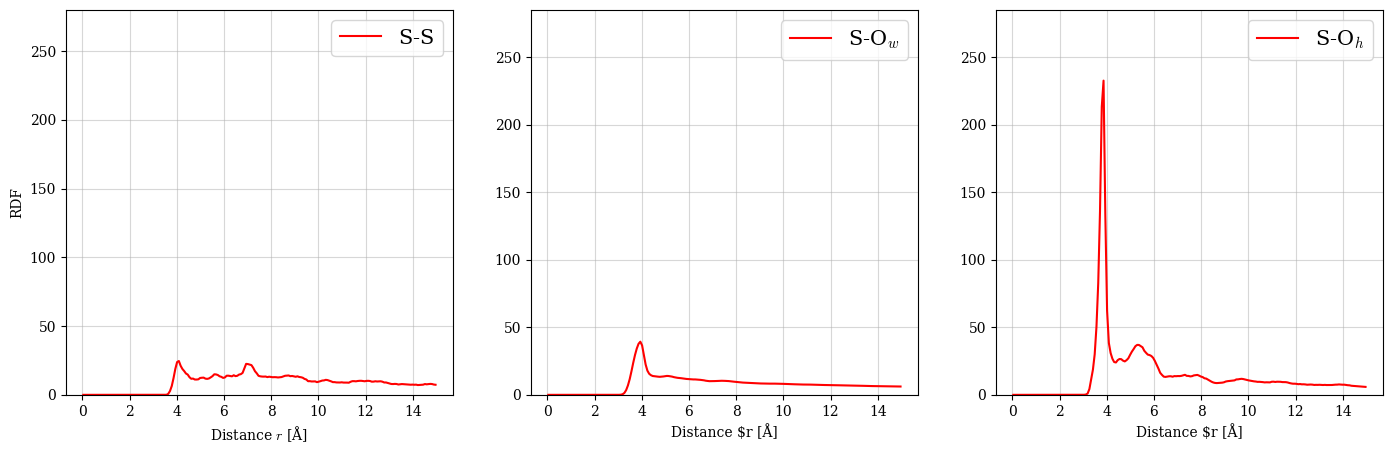

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))

ax[0].plot(df_["r"], df_["RDF S-S"], c="red", label = "S-S")
ax[0].set_xlabel("Distance $r$ [Å]")
ax[0].set_ylabel("RDF")
ax[0].legend(loc="upper right", fontsize=15)
ax[0].set_ylim([-0.1, 280])
ax[0].grid(alpha=0.5)

ax[1].plot(df_["r"], df_["RDF S-Ow"], c="red", label = "S-O$_w$")
ax[1].set_xlabel("Distance $r [Å]")
ax[1].legend(loc="upper right", fontsize=15)
ax[1].set_ylim([-0.1, 285])
ax[1].grid(alpha=0.5)

ax[2].plot(df_["r"], df_["RDF S-Oh"], c="red", label = "S-O$_h$")
ax[2].set_xlabel("Distance $r [Å]")
ax[2].legend(loc="upper right", fontsize=15)
ax[2].set_ylim([-0.1, 285])
ax[2].grid(alpha=0.5)

plt.show()

```
compute myRDF all rdf 200 5 5 5 7 5 9 cutoff 15
fix myat2 all ave/time 10 4000 50000 c_myRDF[*] file RDF_Hydrated_Bulk_Nafion.dat mode vector
```

Some other example: `100 5 1000`

#### Syntax

```
fix ID group-ID ave/time Nevery Nrepeat Nfreq value1 value2 ... keyword args ...
 
    ID, group-ID are documented in fix command
    ave/time = style name of this fix command
    Nevery = use input values every this many time steps
    Nrepeat = # of times to use input values for calculating averages
    Nfreq = calculate averages every this many time steps
    one or more input values can be listed
    value = c_ID, c_ID[N], f_ID, f_ID[N], v_name
     c_ID = global scalar or vector calculated by a compute with ID
     c_ID[I] = Ith component of global vector or Ith column of global array calculated by a compute with ID, I can include wildcard (see below)
     f_ID = global scalar or vector calculated by a fix with ID
     f_ID[I] = Ith component of global vector or Ith column of global array calculated by a fix with ID, I can include wildcard (see below)
     v_name = value(s) calculated by an equal-style or vector-style variable with name
     v_name[I] = value calculated by a vector-style variable with name, I can include wildcard (see below)
    zero or more keyword/arg pairs may be appended
    keyword = mode or file or append or ave or start or off or overwrite or format or title1 or title2 or title3
     mode arg = scalar or vector
      scalar = all input values are global scalars
      vector = all input values are global vectors or global arrays
     ave args = one or running or window M
      one = output a new average value every Nfreq steps
      running = output cumulative average of all previous Nfreq steps
      window M = output average of M most recent Nfreq steps
     start args = Nstart
      Nstart = start averaging on this time step
     off arg = M = do not average this value
      M = value # from 1 to Nvalues
     file arg = filename
      filename = name of file to output time averages to
     append arg = filename
      filename = name of file to append time averages to
     overwrite arg = none = overwrite output file with only latest output
     format arg = string
      string = C-style format string
     title1 arg = string
      string = text to print as 1st line of output file
     title2 arg = string
      string = text to print as 2nd line of output file
     title3 arg = string
      string = text to print as 3rd line of output file, only for vector mode
```